In [38]:
import os
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pylab
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
num_gpu = 1 if torch.cuda.is_available() else 0
num_gpu =0

# load the models
from dcgan import Discriminator, Generator, FeatureExtractor

D = Discriminator(ngpu=0).eval()
G = Generator(ngpu=0).eval()
F = FeatureExtractor(ngpu=0).eval()

# load weights
D.load_state_dict(torch.load('weights/netD_epoch_99.pth',map_location=torch.device('cpu')))
G.load_state_dict(torch.load('weights/netG_epoch_99.pth',map_location=torch.device('cpu')))
F.load_state_dict(torch.load('weights/netD_epoch_99.pth',map_location=torch.device('cpu')),strict=False)

if torch.cuda.is_available():
    D = D.cuda()
    G = G.cuda()

# generate some images

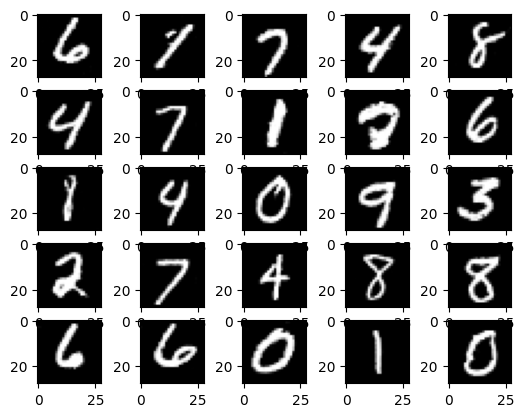

In [42]:
batch_size = 25
latent_size = 100

fixed_noise = torch.randn(batch_size, latent_size, 1, 1)
if torch.cuda.is_available():
    fixed_noise = fixed_noise.cuda()
fake_images = G(fixed_noise)


# z = torch.randn(batch_size, latent_size).cuda()
# z = Variable(z)
# fake_images = G(z)

fake_images_np = fake_images.cpu().detach().numpy()
fake_images_np = fake_images_np.reshape(fake_images_np.shape[0], 28, 28)
R, C = 5, 5
for i in range(batch_size):
    plt.subplot(R, C, i + 1)
    plt.imshow(fake_images_np[i], cmap='gray')
plt.show()

# run discriminator

In [43]:
outputs = D(fake_images)
print(outputs)

tensor([0.4824, 0.0580, 0.1870, 0.3872, 0.0205, 0.1893, 0.0985, 0.2498, 0.6273,
        0.0264, 0.0268, 0.5965, 0.1866, 0.1452, 0.0175, 0.4594, 0.2288, 0.3600,
        0.3048, 0.0676, 0.2385, 0.4449, 0.7400, 0.5121, 0.0441],
       grad_fn=<SqueezeBackward1>)


In [44]:
outputs = F(fake_images)

In [51]:
print(outputs)

tensor([[[[-1.3199e-01,  8.1321e-01,  7.1015e-02],
          [ 9.4386e-01,  9.8904e-01, -1.9695e-01],
          [ 1.1080e-01, -9.7411e-02,  1.2363e+00]],

         [[ 2.0081e+00,  3.7755e-02,  2.7770e+00],
          [-1.1171e-01, -8.9402e-02, -4.0569e-02],
          [-1.9959e-01,  8.0793e-02, -3.9867e-02]],

         [[ 9.1948e-01,  1.4479e+00,  8.8204e-01],
          [ 7.3026e-01,  6.6356e-01, -4.1203e-01],
          [ 3.2712e-01,  5.2041e-01,  1.3213e+00]],

         ...,

         [[-8.5370e-02, -5.4328e-02, -4.9727e-01],
          [ 2.9272e-01,  6.9898e-01,  3.6665e+00],
          [-9.3879e-03, -1.4911e-01, -4.9787e-01]],

         [[-1.0928e-01,  1.6097e+00,  1.5735e-01],
          [-1.2850e-01,  1.1169e+00, -1.1034e-01],
          [ 3.0547e-01,  1.2397e-02, -1.4763e-01]],

         [[-1.4508e-01, -9.8279e-02, -3.1314e-01],
          [-2.1707e-01,  8.9120e-01,  3.5217e+00],
          [-1.6600e-01, -2.3244e-01, -1.5915e-01]]],


        [[[-1.7054e-01,  9.0166e-01,  1.2630e-01],
  

AttributeError: 'NoneType' object has no attribute 'cpu'

In [52]:
output_np =outputs.cpu().detach().numpy()

In [58]:
output_np[0,0]

array([[-0.13198662,  0.81320745,  0.07101524],
       [ 0.94386095,  0.9890446 , -0.19694513],
       [ 0.11080414, -0.09741061,  1.2362864 ]], dtype=float32)